Ch3. 신경망 시작하기
----

In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import backend as K
from keras import models, layers

%matplotlib inline

Using TensorFlow backend.


### 3.1 신경망의 구조

- 네트워크(또는 모델)를 구성하는 층
- 입력 데이터와 그에 상응하는 타깃
- 학습에 사용할 피드백 신호를 정의하는 loss function
- 학습 진행 방식을 결정하는 optimizer

### 그림 들어갈 부분 - 그려 넣기

#### 3.1.1 layer(층) : 딥러닝의 구성 단위

layer은 하나 이상의 텐서를 입력으로 받아 하나 이상의 텐서를 출력하는 데이터 처리 모듈
- 대부분 가중치라는 층의 상태를 가짐
- 가중치는 SGD에 의해 학습되는 하나 이상의 텐서


layer는 처리 방식
- Fully connected layer, recurrent layer, convolution layer 등등
- 케라스에서는 호환 가능한 층들을 엮어 데이터 변환 pipeline을 구성함으로써 딥러닝 모델을 만듬
- layer compatibility는 각 층이 특정 크기의 입력 텐서만 받고 특정 크기의 출력 텐서를 반환 한다는 사실을 말함

keras에서는 자동으로 다음 층이 모델의 상위 층의 크기에 맞추어 준다. 우왕....

```python
model = models.Sequential()
model.add(layers.Dense(32, input_shape(784, )))
model.add(layers.Dense(10))
```

#### 3.1.2 model :  network of layer

딥러닝 모델은 층으로 만든 Directed Acyclic Graph, DAG(비순환 유향 그래프) 이다.
- 네트워크 구조는 hypothesis space(가설 공간)을 정의하고 텐서 연산에 포함된 가중치 텐서를 찾는 것
- 딱 맞는 거 찾기 어려움....힝...-0-

#### 3.1.3 loss function & Optimizer : 학습 과정을 조절하는 열쇠

**loss function(손실 함수)** : 훈련하는 동안 최소화 될 값, 주어진 문제에 대한 성공 지표가 됨
- 이진 분류 문제 : binary crossentropy
- multi classification : categorical_crossentropy
- regression : mse
- sequence : CTC(connection temporal classification)
- 이외에도 많음...

**optimizer** : loss function을 기반으로 network가 어떻게 업데이트될지 결정, 특정 종류의 SGD을 구현...등등등

### 3.2 케라스 소개
- 케라스 짱!
- ~~하지만 텐서플로가 나타나면 어떻게 될까?!~~

#### 3.2.2 케라스 사용한 개발

두 가지 방식으로 구현 가능
- Sequential 클래스 이용 : 7장 까지는 이거 쓸 거임
- 함수형 API(완전히 임의의 구조를 만들 수 있는 DAG 만듬)

모델 구조 정의된 다음에는 뭘 썼는지는 중요하지 않음

### 3.3 생략


### 3.4 영화 리뷰 분류 : 이진 분류 예제

#### 3.4.1 IMDB 데이터셋

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

- num_words = 10000?
  - 가장 자주 나타나는 단어 1만 개만 사용
  - 드물게 나타나는 단어 무시
- 긍정 1, 부정 0

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [4]:
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

#### 3.4.2 데이터 준비

**list to tensor**

방법 1.
- 같은 길이가 되도록 리스트에 padding(패딩)을 추가하고 (samples, sequence_length) 크기의 정수 텐서로 변환
- 그다음 이 정수 텐서를 다룰 수 있는 층을 신경망의 첫 번째 층으로 사용(embedding 층을 말하며, 나중에 설명 예정)
- padding?
  - https://docs.scipy.org/doc/numpy/reference/generated/numpy.pad.html
  - https://m.blog.naver.com/wideeyed/221665256911

방법 2.
- 리스트를 one-hot encoding하여 0과 1의 벡터로 변환

In [5]:
# understanding padding
# 자세한 건 공식 문서 참고

a = [1, 2, 3, 4, 5]
np.pad(a, (2, 3), 'constant', constant_values=(4, 6))

array([4, 4, 1, 2, 3, 4, 5, 6, 6, 6])

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    
    results = np.zeros((len(sequences), dimension))

    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)

# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
# Our vectorized labels

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#### 3.4.3 신경망 모델 만들기

- 층 쌓기
- Dense layer에 전달한 parameter 16은 hidden unit의 개수이다.
  - 하나의 hidden unit은 층이 나타내는 표현 공간에서 하나의 차원이 됨
  - 16개의 은닉이 있다는 것은 가중치 행렬 W의 크기가 (input_dimension, 16)이라는 뜻
  - 입력 데이터와 W를 점곱하면 입력 데이터가 16차원으로 표현된 공간으로 투영
  - 표현 공간의 차원은 '신경망이 내재된 표현을 학습할 때 가질 수 있는 자유도'라고 표현 가능
  - 차원이 크면 더욱 복잡한 표현을 할 수 있지만 계산 비용이 커지고 원하지 않는 패턴을 학습할 수도 있다.

In [9]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.5570 - binary_accuracy: 0.7508 - val_loss: 0.4438 - val_binary_accuracy: 0.8375
Epoch 2/20
15000/15000 [==============================] - 1s 64us/step - loss: 0.3471 - binary_accuracy: 0.8996 - val_loss: 0.3269 - val_binary_accuracy: 0.8885
Epoch 3/20
15000/15000 [==============================] - 1s 63us/step - loss: 0.2466 - binary_accuracy: 0.9227 - val_loss: 0.2854 - val_binary_accuracy: 0.8923
Epoch 4/20
15000/15000 [==============================] - 1s 67us/step - loss: 0.1893 - binary_accuracy: 0.9419 - val_loss: 0.2763 - val_binary_accuracy: 0.8906
Epoch 5/20
15000/15000 [==============================] - 1s 58us/step - loss: 0.1547 - binary_accuracy: 0.9517 - val_loss: 0.2842 - val_binary_accuracy: 0.8857
Epoch 6/20
15000/15000 [==============================] - 1s 55us/step - loss: 0.1275 - binary_accuracy: 0.9614 - val_loss: 0.3252 - val_binary_

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

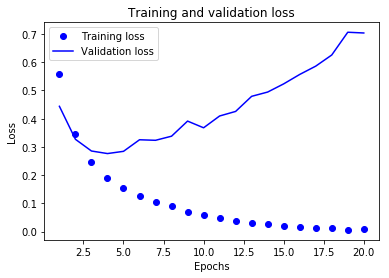

In [18]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


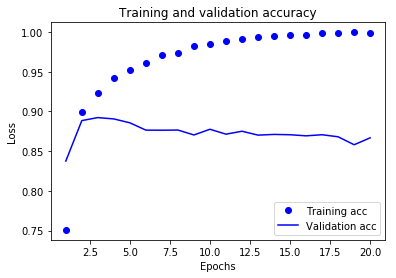

In [19]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [20]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 1s 41us/step - loss: 0.4775 - accuracy: 0.8141
Epoch 2/4
25000/25000 [==============================] - 1s 38us/step - loss: 0.2681 - accuracy: 0.9051
Epoch 3/4
25000/25000 [==============================] - 1s 39us/step - loss: 0.2054 - accuracy: 0.9272
Epoch 4/4
25000/25000 [==============================] - 1s 41us/step


In [21]:
results

[0.2925593851852417, 0.8859999775886536]

In [22]:
model.predict(x_test)

array([[0.18841723],
       [0.99994624],
       [0.8766917 ],
       ...,
       [0.10799121],
       [0.06754788],
       [0.5782201 ]], dtype=float32)